# Sentiment Analysis of Amazon Food Reviews Prediction Model

<b>Data Fields Explanation</b><br />

The Amazon Fine Food Reviews dataset consists of 568,454 food reviews. This dataset consists of a single CSV file, Reviews.csv. The columns in the table are:
<pre>
    Id - Unique row number
    ProductId - unique identifier for the product
    UserId - unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator - number of users who found the review helpful
    HelpfulnessDenominator - number of users who indicated whether they found the review helpful
    Score - rating between 1 and 5
    Time - timestamp for the review
    Summary - brief summary of the review
    Text - text of the review
</pre>

We will built a model on this data using <b>NAIVE BAYES</b>. Let's do everything step by step.
<pre>
    <b>STEP-1:</b> Copy the data in Pandas DataFrame and drop unwanted columns.
    <b>STEP-2:</b> Text Preprocessing.
    <b>STEP-3:</b> Vectorizing out Data Set
    <b>STEP-4:</b> Building and evaluating the model
</pre>

## STEP-1: Reading the data and removing unwanted columns

In [ ]:
#Let's import pandas to read the csv file.
import pandas as pd
dataset = pd.read_csv("Reviews.csv")
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Here we will sort the dataframe according to 'Time' feature
dataset.sort_values(['Time'], ascending=True, inplace=True)
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,5,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
150500,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,5,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
451855,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,5,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
230284,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,5,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
451877,451878,B00004CXX9,A344SMIA5JECGM,Vincent P. Ross,1,2,5,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."


In [ ]:
#Dropping the unwanted columns from our data frame.
dataset.drop("Id", inplace=True, axis=1)
dataset.drop("ProductId", inplace=True, axis=1)
dataset.drop("ProfileName", inplace=True, axis=1)
dataset.drop("HelpfulnessNumerator", inplace=True, axis=1)
dataset.drop("HelpfulnessDenominator", inplace=True, axis=1)
dataset.drop("Time", inplace=True, axis=1)
dataset.head()

,UserId,Score,Summary,Text
150523,ACITT7DI6IDDL,5,EVERY book is educational,this witty little book makes my son laugh at l...
150500,AJ46FKXOVC7NR,5,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
451855,AIUWLEQ1ADEG5,5,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
230284,A344SMIA5JECGM,5,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
451877,A344SMIA5JECGM,5,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."


In [ ]:
#Make all 'Score' less than 3 equal to -ve class and 
# 'Score' greater than 3 equal to +ve class.
dataset.loc[dataset['Score']<3, 'Score'] = [0]
dataset.loc[dataset['Score']>3, 'Score'] = [1]

In [ ]:
dataset.head()

,UserId,Score,Summary,Text
150523,ACITT7DI6IDDL,1,EVERY book is educational,this witty little book makes my son laugh at l...
150500,AJ46FKXOVC7NR,1,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...
451855,AIUWLEQ1ADEG5,1,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...
230284,A344SMIA5JECGM,1,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."
451877,A344SMIA5JECGM,1,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta..."


In [ ]:
#import numpy as np
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(dataset, test_size = 0.3)

total_size=len(dataset)

train_size=int(0.70*total_size)

#training dataset
train=dataset.head(train_size)
#test dataset
test=dataset.tail(total_size - train_size)

In [ ]:
train.Score.value_counts()

1    313696
0     55168
3     29053
Name: Score, dtype: int64

In [ ]:
test.Score.value_counts()

1    130081
0     26869
3     13587
Name: Score, dtype: int64

In [ ]:
# Removing all rows where 'Score' is equal to 3
train = train[train.Score != 3]
test = test[test.Score != 3]

In [ ]:
print(train.shape)
print(test.shape)

(368864, 4)
(156950, 4)


In [ ]:
train['Score'].value_counts()

1    313696
0     55168
Name: Score, dtype: int64

In [ ]:
test.Score.value_counts()

1    130081
0     26869
Name: Score, dtype: int64

## STEP-2: Text Preprocessing

Text preprocessing will further contain a sequence of steps:
    1. Converting to lower-case.
    2. Removing HTML Tags.
    3. Removing Special Characters.
    4. Removing Stop Words.
    5. Stemming (Snowball Stemming)

In [ ]:
#Taking the 'Text' & 'Summary' column in seperate list for further 
#text preprocessing.
lst_text = train['Text'].tolist()
lst_summary = train['Summary'].tolist()

In [ ]:
test_text = test['Text'].tolist()

### Converting to lower-case

In [ ]:
#Converting the whole list to lower-case.
lst_text = [str(item).lower() for item in lst_text]
lst_summary = [str(item).lower() for item in lst_summary]

In [ ]:
test_text = [str(item).lower() for item in test_text]

### Removing HTML Tags

In [ ]:
#Lets now remove all HTML tags from the list of strings.
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in range(len(lst_text)):
    lst_text[i] = striphtml(lst_text[i])
    lst_summary[i] = striphtml(lst_summary[i])

In [ ]:
for i in range(len(test_text)):
    test_text[i] = striphtml(test_text[i])

In [ ]:
lst_text[0:5]

["this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, india, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will still be able to recite from memory when he is  in college",
 "i can remember seeing the show when it aired on television years ago, when i was a child.  my sister later bought me the lp (which i have to this day,  i'm thirty something).i used this series of books &amp; songs when i did my  student teaching for preschoolers &amp; turned the whole school on to it.  i am now purchasing it on cd, along with the books for my children 5 &amp;  2.  the tradition lives on!",
 'beetlejuice is a well written movie ..... everything about it is excellent! from the acting to the special effects you will be delighted you chose to view this movie.',
 "a twist of rumplestiskin captured o

### Removing Special Characters

In [ ]:
#Now we will remove all special characters from the strings.
for i in range(len(lst_text)):
    lst_text[i] = re.sub(r'[^A-Za-z]+', ' ', lst_text[i])
    lst_summary[i] = re.sub(r'[^A-Za-z]+', ' ', lst_summary[i])

In [ ]:
for i in range(len(test_text)):
    test_text[i] = re.sub(r'[^A-Za-z]+', ' ', test_text[i])

In [ ]:
lst_text[0:5]

['this witty little book makes my son laugh at loud i recite it in the car as we re driving along and he always can sing the refrain he s learned about whales india drooping roses i love all the new words this book introduces and the silliness of it all this is a classic book i am willing to bet my son will still be able to recite from memory when he is in college',
 'i can remember seeing the show when it aired on television years ago when i was a child my sister later bought me the lp which i have to this day i m thirty something i used this series of books amp songs when i did my student teaching for preschoolers amp turned the whole school on to it i am now purchasing it on cd along with the books for my children amp the tradition lives on ',
 'beetlejuice is a well written movie everything about it is excellent from the acting to the special effects you will be delighted you chose to view this movie ',
 'a twist of rumplestiskin captured on film starring michael keaton and geena d

### Removing Stop Words

In [ ]:
#Removing Stop Words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#word_tokenize accepts a string as an input, not a file.
stop_words = set(stopwords.words('english'))
for i in range(len(lst_text)):
    text_filtered = []
    summary_filtered = []
    text_word_tokens = []
    summary_word_tokens = []
    text_word_tokens = lst_text[i].split()
    summary_word_tokens = lst_summary[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(r)
    lst_text[i] = ' '.join(text_filtered)
    for r in summary_word_tokens:
        if not r in stop_words:
            summary_filtered.append(r)
    lst_summary[i] = ' '.join(summary_filtered)

In [ ]:
for i in range(len(test_text)):
    text_filtered = []
    text_word_tokens = []
    text_word_tokens = test_text[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(r)
    test_text[i] = ' '.join(text_filtered)

### Stemming

The <b>three major stemming algorithms</b> in use today are Porter, Snowball(Porter2), and Lancaster (Paice-Husk), with the aggressiveness continuum basically following along those same lines.

<b>Porter:</b> Most commonly used stemmer without a doubt, also one of the most gentle stemmers. One of the few stemmers that actually has Java support which is a plus, though it is also the most computationally intensive of the algorithms(Granted not by a very significant margin). It is also the oldest stemming algorithm by a large margin.

<b>Snowball:</b> Nearly universally regarded as an improvement over porter, and for good reason. Porter himself in fact admits that it is better than his original algorithm. Slightly faster computation time than porter, with a fairly large community around it.

<b>Lancaster:</b> Very aggressive stemming algorithm, sometimes to a fault. With porter and snowball, the stemmed representations are usually fairly intuitive to a reader, not so with Lancaster, as many shorter words will become totally obfuscated. The fastest algorithm here, and will reduce your working set of words hugely, but if you want more distinction, not the tool you would want.

### Snowball Stemming

In [ ]:
#Lets now stem each word.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
for i in range(len(lst_text)):
    text_filtered = []
    summary_filtered = []
    text_word_tokens = []
    summary_word_tokens = []
    text_word_tokens = lst_text[i].split()
    summary_word_tokens = lst_summary[i].split()
    for r in text_word_tokens:
        text_filtered.append(str(stemmer.stem(r)))
    lst_text[i] = ' '.join(text_filtered)
    for r in summary_word_tokens:
        summary_filtered.append(str(stemmer.stem(r)))
    lst_summary[i] = ' '.join(summary_filtered)

In [ ]:
for i in range(len(test_text)):
    text_filtered = []
    text_word_tokens = []
    text_word_tokens = test_text[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(str(stemmer.stem(r)))
    test_text[i] = ' '.join(text_filtered)

In [ ]:
lst_text[0:5]

['witti littl book make son laugh loud recit car drive along alway sing refrain learn whale india droop rose love new word book introduc silli classic book will bet son still abl recit memori colleg',
 'rememb see show air televis year ago child sister later bought lp day thirti someth use seri book amp song student teach preschool amp turn whole school purchas cd along book children amp tradit live',
 'beetlejuic well written movi everyth excel act special effect delight chose view movi',
 'twist rumplestiskin captur film star michael keaton geena davi prime tim burton masterpiec rumbl absurd wonder pace point dull moment',
 'twist rumplestiskin captur film star michael keaton geena davi prime tim burton masterpiec rumbl absurd wonder pace point dull moment']

In [ ]:
test_text[0:5]

['love make smoothi chocol protein powder peanut butter banana pb drove calori way calori tbsp pb powder calori tbsp tast realli great',
 'smooth impli weak robust impli bitter neither true negat true wonder complex simpl cup joe pleas',
 'alway hate instant oatmeal like old fashion thick cut roll oat like steel cut whenev tri instant version oatmeal past found entir ined thin wateri textur real oatmeal flavor mcdougal oatmeal cup close real thing bare differ initi tri order pack favorit flavor realli happi breakfast everi morn oatmeal tea issu small amount soy use fresh prefer use someth els least sure soy organ find coupl rancid cup batch need sure fresh overal great product though',
 'tri creamer like caramel flavor coffe like creamer whether like matter person prefer detect caramel tast one sip enough due overwhelm sweet tast like someon drop dozen tablespoon sugar coffe like extrem sweet coffe care caramel flavor might like product main want caramel flavor would better caramel syr

## STEP-3: Vectorizing our dataset



From the scikit-learn documentation:

    Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
    
    We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer to "convert text into a matrix of token counts".

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vect = CountVectorizer()
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
X_train_dtm = vect.fit_transform(lst_text)
# Numpy arrays are easy to work with, so convert the result to an 
# array
#train_data_features = train_data_features.toarray()

In [ ]:
# examine the document-term matrix
X_train_dtm

<368864x71178 sparse matrix of type '<type 'numpy.int64'>'
	with 11579336 stored elements in Compressed Sparse Row format>

In order to <b>make a prediction</b>, the new observation <b>must have the same features as the training observations</b>, both in number and meaning.

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(test_text)
X_test_dtm

<156950x71178 sparse matrix of type '<type 'numpy.int64'>'
	with 5017739 stored elements in Compressed Sparse Row format>

<b>Summary:</b>
<ul>
    <li> <code>vect.fit(lst_text)</code> <b>learns the vocabulary</b> of the training data
    <li> <code>vect.transform(lst_text)</code> <b>uses the fitted vocabulary</b> to build a <b>document-term matrix</b> from the training data
    <li> <code>vect.transform(test_text)</code> <b>uses the fitted vocabulary</b> to build a document-term matrix from the testing data (and <b>ignores tokens</b> it hasn't seen before)
</ul>



## STEP-4: Building and evaluating the model

### Models

Here we will be implementing various models and comparing their accuracies. We would be implementing below mentioned machine learning algorithms:
<ul>
<li>Naive Bayes
<li>Logistic Regression - with L1 regularizors
</ul>

### Evaluation Metrics

<b>What is the Confusion Mattix?</b><br />
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.<br />
<img src="con_matrix.png" />

Let's now define the most basic terms, which are whole numbers (not rates):<br />
<pre>
    <b>true positives (TP)</b>: These are cases in which we predicted yes (they have the disease), and they do have the disease.
    <b>true negatives (TN)</b>: We predicted no, and they don't have the disease.
    <b>false positives (FP)</b>: We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
    <b>false negatives (FN)</b>: We predicted no, but they actually do have the disease. (Also known as a "Type II error.")
</pre>
<br /><br />
Various Evaluation metrics are:<br />
<b>Accuracy</b>: Overall, how often is the classifier correct? Accuracy works best if false positives and false negatives have similar cost. This fails in case of imbalanced dataset. For that we have other metrics, like Precision and Recall.<br />
Accuracy = TP+TN/TP+FP+FN+TN
<br />
<b>True Positive Rate</b>: When it's actually yes, how often does it predict yes? Also known as "Sensitivity" or <b>"Recall"</b><br />
<b>False Positive Rate</b>: When it's actually no, how often does it predict yes?<br />
<b>F1 Score</b>: This is a weighted average of the true positive rate (recall) and precision.<br />
<b>ROC Curve</b>: This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class. <br />
<b>Log-loss</b>: It is usefull in comparing two models. For a perfect Classifier log-loss=0. For a incorrect classifier log-loss=infinity.<br />

<b>Precision (P)</b> is defined as the number of true positives (TP) over the number of true positives plus the number of false positives (FP).<br />
Precision = TP/TP+FP

<b>Recall (R)</b> is defined as the number of true positives (TP) over the number of true positives plus the number of false negatives (FP).<br />
Recall = TP/TP+FN

These quantities are also related to the <b>F1 score</b>, which is defined as the harmonic mean of precision and recall. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.<br />
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. Note the below mentioned points: <br />
<ul>
<li>High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).<br />
<li>A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. <br />
<li>A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. <br />
<li>An ideal system with high precision and high recall will return many results, with all results labeled correctly.<br />
</ul>

### Multinomial Naive Bayes

We will use <b>Multinomial Naive Bayes</b>:

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.


In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
# train the model using X_train_dtm (timing it with an IPython 
#"magic command")
%time nb.fit(X_train_dtm, train.Score)

Wall time: 157 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class_nb = nb.predict(X_test_dtm)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.89497929276839761

In [ ]:
# print the confusion matrix
con_metrics_nb = metrics.confusion_matrix(test.Score, y_pred_class_nb)
con_metrics_nb

array([[ 17759,   9110],
       [  7373, 122708]])

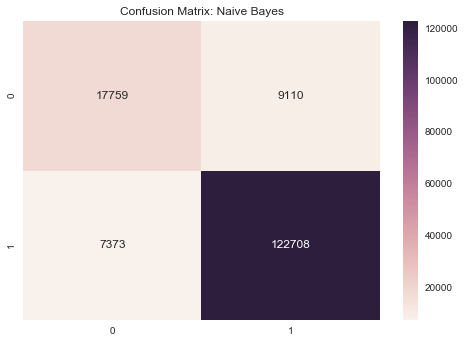

In [ ]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metrics_nb, annot=True, fmt='d')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

In [ ]:
#Checking Precision, Recall and F1 Score
print metrics.classification_report(test.Score, y_pred_class_nb)

             precision    recall  f1-score   support

          0       0.71      0.66      0.68     26869
          1       0.93      0.94      0.94    130081

avg / total       0.89      0.89      0.89    156950



In [ ]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
#y_pred_prob

In [ ]:
# calculate AUC - Method 1
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test.Score, y_pred_class_nb)
print metrics.auc(false_positive_rate, true_positive_rate)

0.802133745906


In [ ]:
# calculate AUC _ Method - 2
auc_nb = metrics.roc_auc_score(test.Score, y_pred_class_nb)
print(auc_nb)

0.802133745906


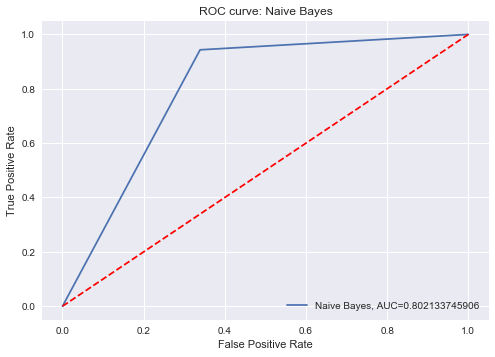

In [ ]:
#Plotting Area Under the Curve
plt.plot(false_positive_rate,true_positive_rate,label="Naive Bayes, AUC="+str(auc_nb))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Naive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Calculating Log-Loss
metrics.log_loss(test.Score, y_pred_class_nb)

3.6273331357113858

### Logistic Regression with L1 Regularizor

In [ ]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg_l1 = LogisticRegression(penalty='l1')

In [ ]:
# train the model using X_train_dtm
%time logreg_l1.fit(X_train_dtm, train.Score)

Wall time: 15.3 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class_l1 = logreg_l1.predict(X_test_dtm)

In [ ]:
# calculate accuracy
metrics.accuracy_score(test.Score, y_pred_class_l1)

0.9137878305192737

In [ ]:
# print the confusion matrix
con_metrics_l1 = metrics.confusion_matrix(test.Score, y_pred_class_l1)
con_metrics_l1

array([[ 17911,   8958],
       [  4573, 125508]])

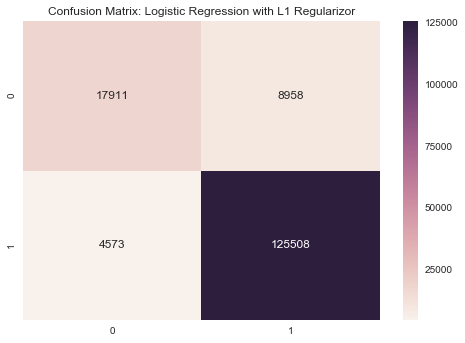

In [ ]:
#ploting heatmap for confusion matrix
sns.heatmap(con_metrics_l1, annot=True, fmt='d')
plt.title("Confusion Matrix: Logistic Regression with L1 Regularizor")
plt.show()

In [ ]:
#Checking Precision, Recall and F1 Score
print metrics.classification_report(test.Score, y_pred_class_l1)

             precision    recall  f1-score   support

          0       0.80      0.67      0.73     26869
          1       0.93      0.96      0.95    130081

avg / total       0.91      0.91      0.91    156950



In [ ]:
# calculate AUC
auc_l1 = metrics.roc_auc_score(test.Score, y_pred_class_l1)
print(auc_l1)

0.815724809259


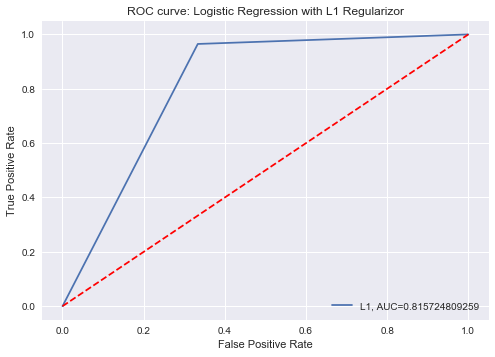

In [ ]:
#Plotting Area Under the Curve
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test.Score, y_pred_class_l1)
plt.plot(false_positive_rate,true_positive_rate,label="L1, AUC="+str(auc_l1))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve: Logistic Regression with L1 Regularizor')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Calculating Log-Loss
metrics.log_loss(test.Score, y_pred_class_l1)

2.9777084816394788